In [19]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [20]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

In [21]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [22]:
import seaborn as sns
sns.set(style="darkgrid")

In [23]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [26]:
input_ch3 = pd.read_csv('notebook8-LDAFeature-thisch3.csv')

In [27]:
input_ch3.drop('Unnamed: 0', axis=1, inplace=True)
# input_ch3.drop('content', axis=1,inplace=True)
# input_ch3.drop('share', axis=1, inplace=True)
# input_ch3.drop('like', axis=1, inplace=True)
# input_ch3.drop('comment', axis=1, inplace=True)
# input_ch3.drop('time', axis=1, inplace=True)
# input_ch3.drop('Unnamed: 0.1', axis=1, inplace=True)


In [28]:
input_ch3.head()

,DOW,category,date,headline,hour,is_การเมือง,is_กีฬา,is_ต่างประเทศ,is_บันเทิง,is_สังคมออนไลน์,is_อาชญากรรม,is_เศรษฐกิจ,is_โครงข่ายตาสับปะรด,is_ในประเทศ,is_ในพระราชสำนัก,is_ไลฟ์สไตล์,month,nadverb_per_ntoken,nnoun_per_ntoken,numChar,numTag,numToken,num_adverb,num_classifier,num_conjunction,num_date,num_determiner,num_email,num_ending,num_interjunction,num_law,num_len,num_location,num_money,num_neg,num_negator,num_noun,num_organization,num_percent,num_person,num_person_2,num_phone,num_pos,num_prefix,num_preposition,num_preverb,num_pronoun,num_punctuation,num_tag_pop,num_tag_worst,num_time,num_url,num_verb,nverb_per_ntoken,sim_top,sim_worst,tag,tag_pop_mean,tag_pop_sum,tag_top_pop_mean,tag_top_pop_sum,tag_top_worst_mean,tag_top_worst_sum,time,timeDelta,token,view,year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,FRI,ในประเทศ,2019-04-05,"เจ้าหน้าที่ยังตามหา""น้องภาคิน""หายตัวจากบ้าน",19,0,0,0,0,0,0,0,0,1,0,0,4,0.0,0.666667,32,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0.333333,0.639522,0.655310,"น้องภาคิน,เด็กหาย,เพชรบุรี",105,422,1,1,0,0,19:01,15,"เจ้าหน้าที่,หา,น้องภาคิน,หาย,ตัว,บ้าน",143,2019,0.213750,0.017914,0.678888,0.017887,0.017895,0.017889,0.017888,0.017889
1,FRI,กีฬา,2019-04-05,"""รัชนก""พ่าย""ไท่ ซื่อ หยิง""มือ 1 โลก ร่วงตกรอบ 8 คน แบดมาเลเซีย โอเพ่น",18,0,1,0,0,0,0,0,0,0,0,0,4,0.0,0.916667,54,4,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.000000,0.687734,0.669493,"ไท่ ซื่อ หยิง,มาเลเซีย โอเพ่น,แบดมินตัน,รัชนก อินทนนท์",13,65,1,1,3,3,18:50,15,"รัชนก,พ่าย,ไท่,ซื่อ,หยิง,มือ,โลก,ร่วง,ตกรอบ,คน,แบดมาเลเซีย,โอเพ่น",108,2019,0.000000,0.092907,0.000000,0.000000,0.000000,0.000000,0.094430,0.764516
2,FRI,กีฬา,2019-04-05,“สราวุฒิ” สุดเจ๋งผงาดคว้าแชมป์สเตจ 5 จักรยานทางไกล ทัวร์ ออฟ ไทยแลนด์,18,0,1,0,0,0,0,0,0,0,0,0,4,0.0,1.111111,52,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.630430,0.685085,"ทัวร์ ออฟ ไทยแลนด์,สราวุฒิ สิริรณชัย,จักรยานทางไกล",4,14,0,0,0,0,18:38,15,"สราวุฒิ,เจ๋ง,ผงาด,คว้า,แชมป์,สเตจ,จักรยาน,ทัวร์,ออฟ ไทยแลนด์",205,2019,0.013859,0.013859,0.013859,0.013871,0.346034,0.013864,0.013867,0.570786
3,FRI,บันเทิง,2019-04-05,"""แบงค์ ฮอร์โมน""ขอผ่อนผันการเกณฑ์ทหาร",18,0,0,0,1,0,0,0,0,0,0,0,4,0.0,1.250000,29,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.605985,0.516583,"แบงค์ ฮอร์โมน,ผ่อนผันทหาร",18,74,0,0,0,0,18:25,15,"แบงค์ ฮอร์โมน,ผ่อนผัน,เกณฑ์,ทหาร",73,2019,0.031206,0.031130,0.281737,0.282324,0.031143,0.031160,0.031130,0.280169
4,FRI,กีฬา,2019-04-05,สนามฟุตบอลจากขยะรีไซเคิล ช่วงบอลโลก 2018,18,0,1,0,0,0,0,0,0,0,0,0,4,0.0,1.000000,31,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0.000000,0.609096,1.000000,"ฟุตบอลโลก 2018,สนามฟุตบอล,สนามฟุตบอลจากวัสดุรีไซเคิล,ขยะรีไซเคิล",127,511,0,0,1,6,18:06,15,"สนาม,ฟุตบอล,ขยะ,รีไซเคิล,บอล,โลก,2018",18,2019,0.015630,0.015630,0.015630,0.402445,0.015669,0.503730,0.015633,0.015632


In [29]:
input_ch3['view'].describe()

count    45269.000000 
mean     825.004462   
std      3441.722419  
min      5.000000     
25%      176.000000   
50%      309.000000   
75%      596.000000   
max      233230.000000
Name: view, dtype: float64

In [30]:
MAXVIEW = input_ch3['view'].max()
MAXVIEW

233230

In [31]:
view_mean = input_ch3['view'].describe()['mean']
view_sd = input_ch3['view'].describe()['std']

In [32]:
input_ch3['view'].describe()

count    45269.000000 
mean     825.004462   
std      3441.722419  
min      5.000000     
25%      176.000000   
50%      309.000000   
75%      596.000000   
max      233230.000000
Name: view, dtype: float64

In [33]:
len(input_ch3)

45269

## Feature extraction

In [34]:
# input_ch3_train, input_ch3_test = train_test_split(input_ch3, test_size=0.2,random_state=100)

In [35]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(input_ch3_train['view'],ax=axarr[0])
# sns.distplot(input_ch3_test['view'],ax=axarr[1])

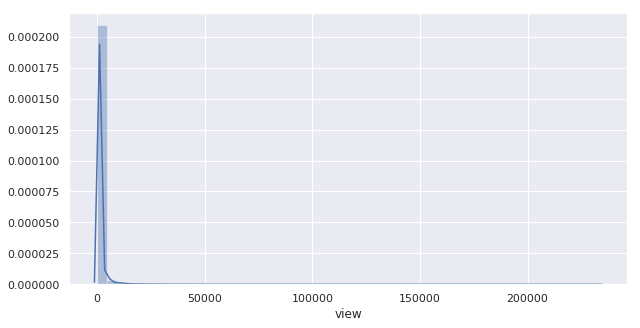

In [36]:
f, axarr = plt.subplots( figsize=(10,5))
sns.distplot(input_ch3['view'])

In [37]:
view_df = pd.DataFrame(input_ch3['view'])

In [38]:
view_df.shape

(45269, 1)

In [39]:
from sklearn.cluster import KMeans

In [40]:
k=2

In [41]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(view_df)
kmeans.cluster_centers_

array([[57645.77777778],
       [  711.81316541]])

In [42]:
input_ch3['class'] = 0

In [43]:
for i in range(9):
    split_class = np.argmax(input_ch3['class'].value_counts())
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pd.DataFrame(input_ch3[input_ch3['class']==split_class]['view']))
#     print(kmeans.cluster_centers_)
#     print(input_ch3_train['class'].value_counts())
    if len(np.argwhere(kmeans.labels_ == 0)) < len(np.argwhere(kmeans.labels_ == 1)):
        tmp = np.argwhere(kmeans.labels_ == 0)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 1)] = split_class
        kmeans.labels_[tmp] = 9-i
    else:
        tmp = np.argwhere(kmeans.labels_ == 1)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 0)] = split_class
        kmeans.labels_[tmp] = 9-i
    input_ch3.loc[(input_ch3['class'] == split_class), 'class'] = kmeans.labels_
#     print(input_ch3_train['class'].value_counts())


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current 

In [44]:
print(input_ch3['class'].value_counts())

6    7898
5    7239
0    6133
4    5615
3    5066
1    4923
2    4575
7    2938
8    792 
9    90  
Name: class, dtype: int64


In [45]:
input_ch3.groupby('class')['view'].describe()['max']

class
0    170.0   
1    288.0   
2    111.0   
3    578.0   
4    227.0   
5    419.0   
6    1560.0  
7    5549.0  
8    29021.0 
9    233230.0
Name: max, dtype: float64

In [46]:
input_ch3 = input_ch3[(input_ch3['class']!=7)&(input_ch3['class']!=8)&(input_ch3['class']!=9)]

In [47]:
# input_ch3 = input_ch3[(input_ch3['class']!=5)]

In [48]:
# input_ch3_train.loc[(input_ch3_train['class'] == 5), 'class'] = 4
# input_ch3_train.loc[(input_ch3_train['class'] == 6), 'class'] = 4
# input_ch3_train.loc[(input_ch3_train['class'] == 7), 'class'] = 4

In [49]:
print(input_ch3['class'].value_counts())

6    7898
5    7239
0    6133
4    5615
3    5066
1    4923
2    4575
Name: class, dtype: int64


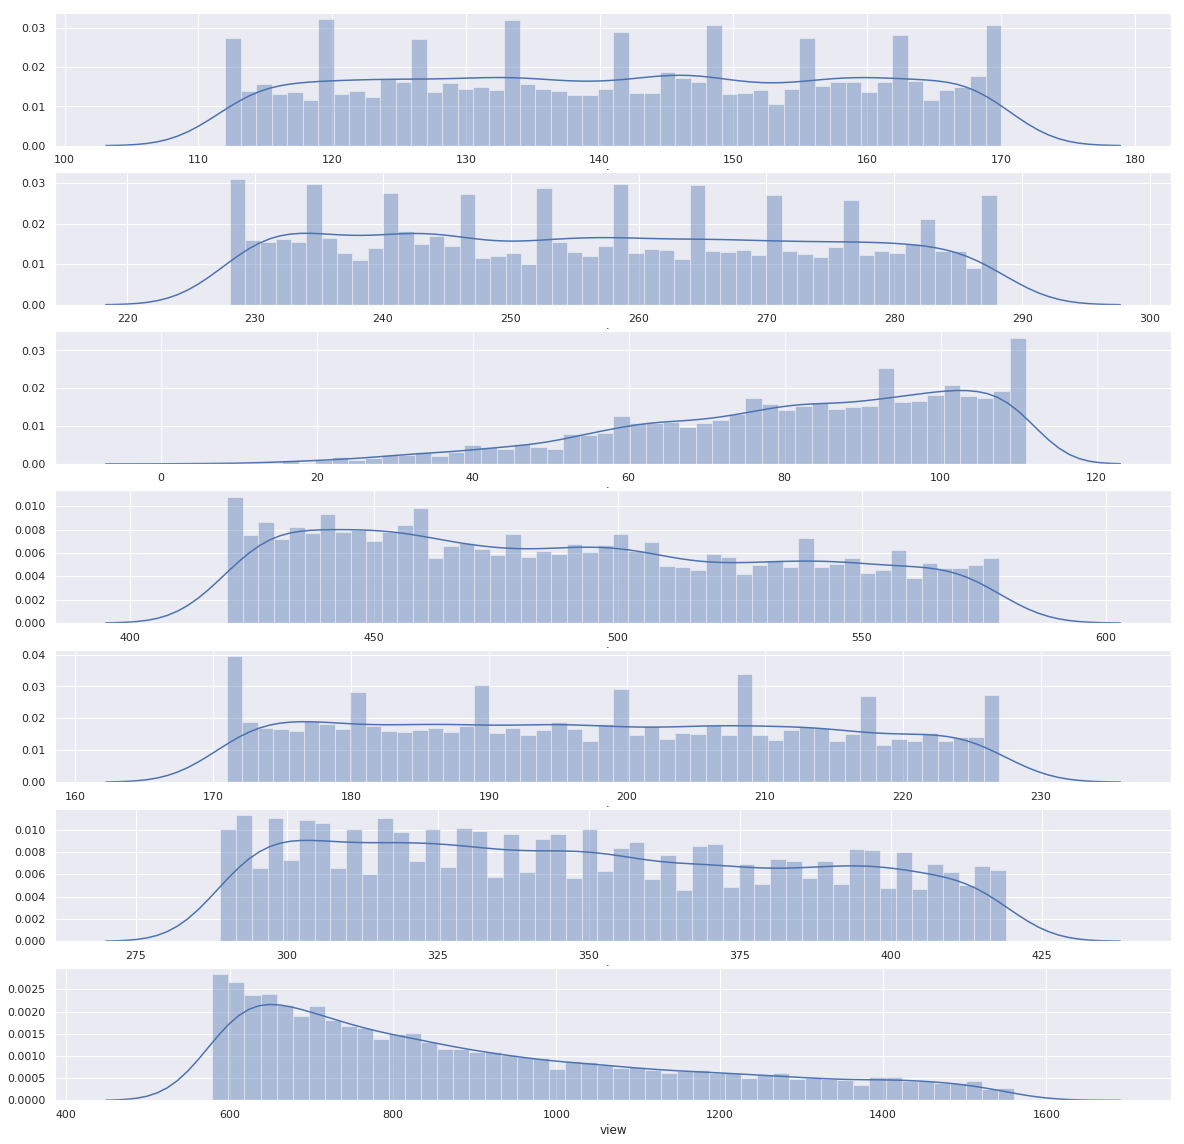

In [50]:
f, axarr = plt.subplots(7, figsize=(20,20))
for i in range(7):
#     print(i,len(input_ch3_train[input_ch3_train['class']==i]))
    if len(input_ch3[input_ch3['class']==i]) > 1:
        sns.distplot(input_ch3[input_ch3['class']==i]['view'],ax=axarr[i],bins=50)


In [51]:
input_ch3_train, input_ch3_test = train_test_split(input_ch3, test_size=0.2,random_state=100)

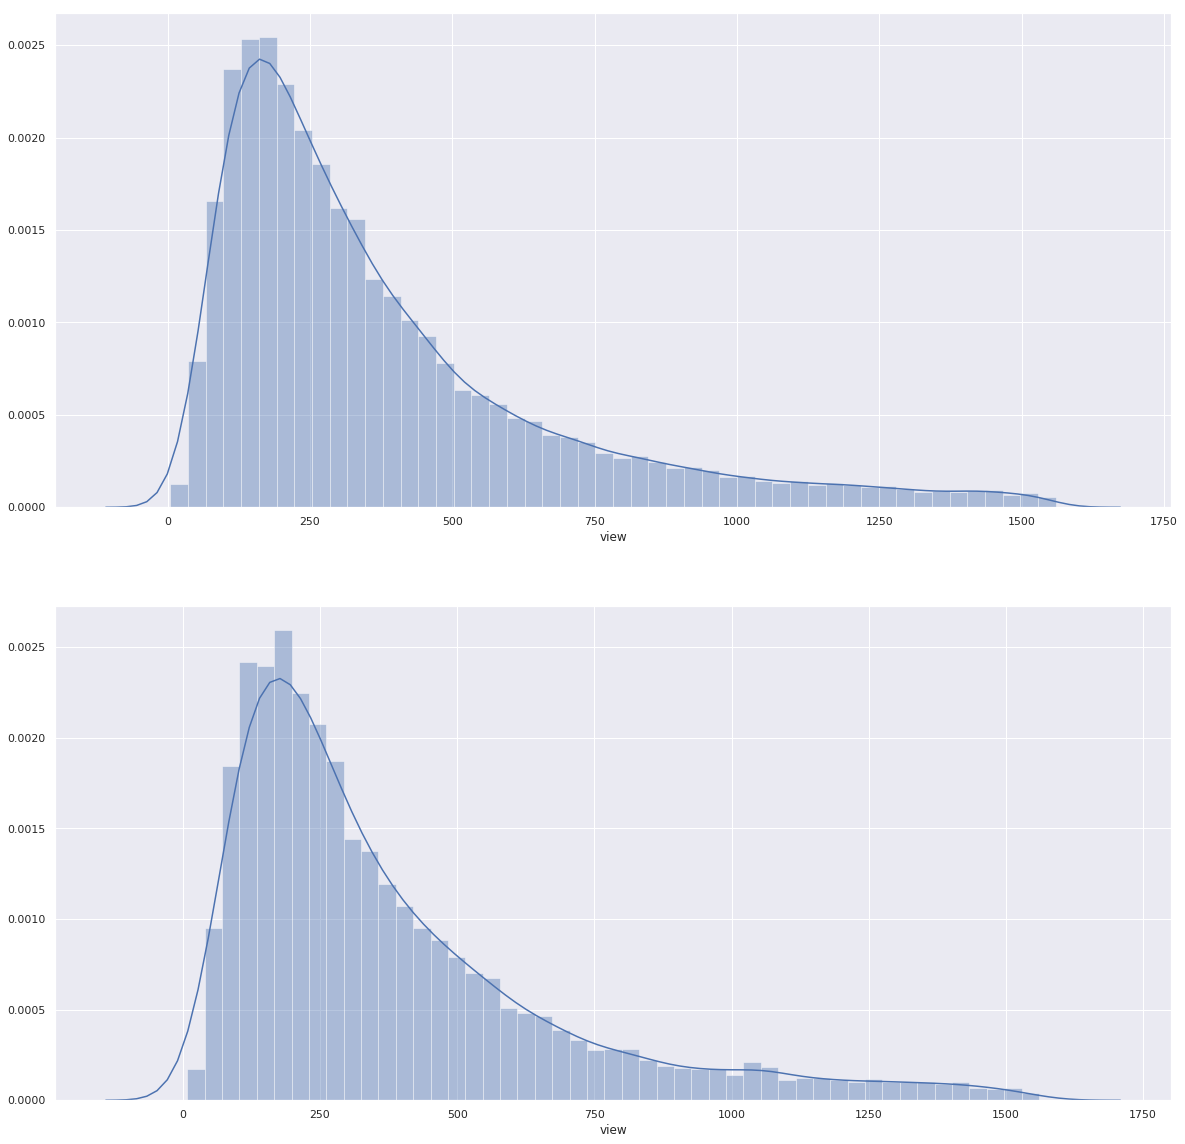

In [52]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_ch3_train['view'],ax=axarr[0])
sns.distplot(input_ch3_test['view'],ax=axarr[1])

## Bag of word feature

In [53]:
inputText_train = []
for sent in input_ch3_train['token']:
    inputText_train.append(sent.split(','))

In [54]:
inputText_test = []
for sent in input_ch3_test['token']:
    inputText_test.append(sent.split(','))

In [55]:
np.log(input_ch3_train['view']).describe()

count    33159.000000
mean     5.653868    
std      0.769283    
min      1.609438    
25%      5.117994    
50%      5.641907    
75%      6.190315    
max      7.352441    
Name: view, dtype: float64

In [56]:
# MINVIEW

In [57]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(inputLabel_train,ax=axarr[0])
# sns.distplot(inputLabel_test,ax=axarr[1])

In [58]:
# print(len(inputText_train),len(inputLabel_train))

In [59]:
# print(len(inputText_test),len(inputLabel_test))

In [60]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//10]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [61]:
len(word_count)

2776

In [62]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [63]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [64]:
len(all_token)

2778

In [65]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [66]:
input_data_train = np.asarray(input_ch3_train['token'].str.split(','))
input_data_test = np.asarray(input_ch3_test['token'].str.split(','))

In [67]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [68]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [69]:
x_f1_train.shape

(33159, 2778)

## Numerical feature

In [70]:
input_ch3.columns[50:]

Index(['num_time', 'num_url', 'num_verb', 'nverb_per_ntoken', 'sim_top',
       'sim_worst', 'tag', 'tag_pop_mean', 'tag_pop_sum', 'tag_top_pop_mean',
       'tag_top_pop_sum', 'tag_top_worst_mean', 'tag_top_worst_sum', 'time',
       'timeDelta', 'token', 'view', 'year', 'Topic 0', 'Topic 1', 'Topic 2',
       'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'class'],
      dtype='object')

In [71]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7']



In [72]:
len(numerical_feature)

54

In [73]:
cs = MinMaxScaler()

In [74]:
trainContinuous = cs.fit_transform(input_ch3_train[numerical_feature])
testContinuous = cs.fit_transform(input_ch3_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [75]:
trainContinuous.shape

(33159, 54)

## Categorial feature

In [76]:
categorial_feature = ['DOW',
        'month', 'year','hour',
       'is_การเมือง', 'is_กีฬา',
       'is_ต่างประเทศ', 'is_บันเทิง', 'is_สังคมออนไลน์', 'is_อาชญากรรม',
       'is_เศรษฐกิจ', 'is_โครงข่ายตาสับปะรด', 'is_ในประเทศ',
       'is_ในพระราชสำนัก', 'is_ไลฟ์สไตล์',
       ]

# categorial_feature = ['DOW', 'hour',
#         'month', 'year',
#         'is_environment',
#        'is_crime', 'is_social',
#          'is_science', 
#         'is_Mon', 'is_Tue', 'is_Wed',
#        'is_Thu', 'is_Fri',   'is_weekend', 'is_pos',
#        'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [77]:
len(categorial_feature)

15

In [78]:
lb = preprocessing.LabelBinarizer()

In [79]:
# zipBinarizer = lb.fit(input_ch3["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_ch3_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_ch3_test["DOW"])
# zipBinarizer = lb.fit(input_ch3["month"])
# trainCategorical_month = zipBinarizer.transform(input_ch3_train["month"])
# testCategorical_month = zipBinarizer.transform(input_ch3_test["month"])
# zipBinarizer = lb.fit(input_ch3["year"])
# trainCategorical_year = zipBinarizer.transform(input_ch3_train["year"])
# testCategorical_year = zipBinarizer.transform(input_ch3_test["year"])
# zipBinarizer = lb.fit(input_ch3["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_ch3_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_ch3_test["hour"])
# zipBinarizer = lb.fit(input_ch3["category"])
# trainCategorical_category = zipBinarizer.transform(input_ch3_train["category"])
# testCategorical_category = zipBinarizer.transform(input_ch3_test["category"])
# zipBinarizer = lb.fit(input_ch3["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_ch3_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_ch3_test["sentiment"])

In [80]:
# input_ch3[input_ch3['hour'].isnull()]

## Concat feature

In [81]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
#     print(f)
    zipBinarizer = lb.fit(input_ch3[f])
    trainCategorical = zipBinarizer.transform(input_ch3_train[f])
    testCategorical = zipBinarizer.transform(input_ch3_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(33159, 2832)


In [82]:
x_train = tmp_train
x_test = tmp_test

In [83]:
x_train.shape

(33159, 2885)

In [147]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [148]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [149]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## create y

In [84]:
view_bound = list(input_ch3_train.groupby('class')['view'].describe()['max'])

In [85]:
view_bound

[170.0, 288.0, 111.0, 578.0, 227.0, 419.0, 1560.0]

In [86]:
view_bound = sorted(view_bound)

In [87]:
view_bound

[111.0, 170.0, 227.0, 288.0, 419.0, 578.0, 1560.0]

In [88]:
inputLabel_train_class = []
for view in input_ch3_train['view']:
    if view <= view_bound[0] :
        inputLabel_train_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_train_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_train_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_train_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_train_class.append(4)
    elif view <= view_bound[5] : 
        inputLabel_train_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_train_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_train_class.append(7)
    else:
        inputLabel_train_class.append(6)

In [89]:
inputLabel_test_class = []
for view in input_ch3_test['view']:
    if view <= view_bound[0] :
        inputLabel_test_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_test_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_test_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_test_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_test_class.append(4)
    elif view <= view_bound[5] : 
        inputLabel_test_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_test_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_test_class.append(7)
    else:
        inputLabel_test_class.append(6)

In [90]:
input_ch3['class2'] = 0
for index, row in input_ch3.iterrows():
    if row['view'] <= view_bound[0] :
        input_ch3.loc[index, 'class2'] = 0
    elif row['view'] <= view_bound[1] :
        input_ch3.loc[index, 'class2'] = 1
    elif row['view'] <= view_bound[2] :
        input_ch3.loc[index, 'class2'] = 2
    elif row['view'] <= view_bound[3] :
        input_ch3.loc[index, 'class2'] = 3
    elif row['view'] <= view_bound[4] :
        input_ch3.loc[index, 'class2'] = 4
    elif row['view'] <= view_bound[5] :
        input_ch3.loc[index, 'class2'] = 5
    else:
        input_ch3.loc[index, 'class2'] = 6

In [92]:
print("number of data in each class")
input_ch3['class2'].value_counts()

number of data in each class


6    7898
4    7239
1    6133
2    5615
5    5066
3    4923
0    4575
Name: class2, dtype: int64

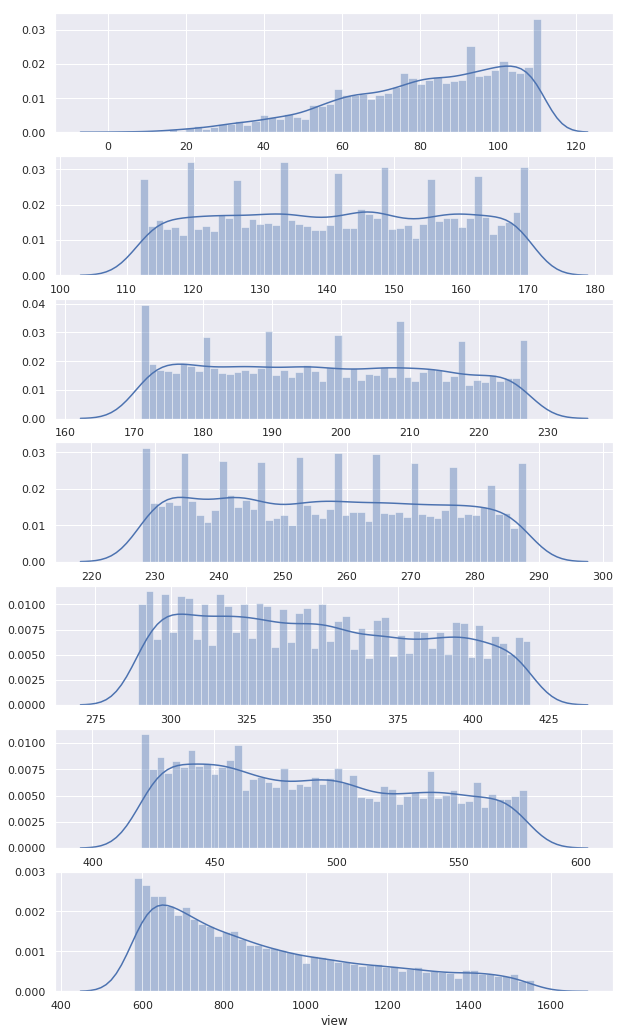

In [97]:
f, axarr = plt.subplots(7, figsize=(10,18))
for i in range(7):
#     print(i,len(input_ch3_train[input_ch3_train['class']==i]))
    if len(input_ch3[input_ch3['class2']==i]) > 1:
        sns.distplot(input_ch3[input_ch3['class2']==i]['view'],ax=axarr[i],bins=50)

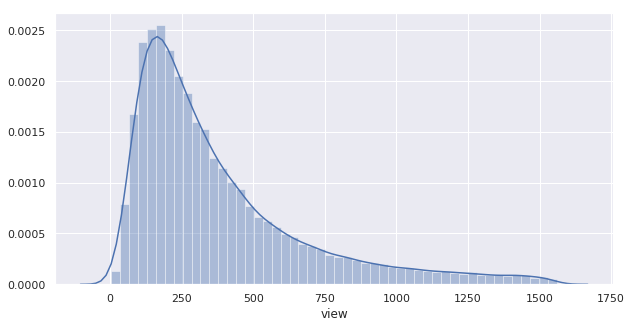

In [98]:
f, axarr = plt.subplots(1, figsize=(10,5))
sns.distplot(input_ch3['view'])

In [156]:
y_train_class = inputLabel_train_class
y_train_class = np.asarray(y_train_class).reshape(-1,1)
y_test_class = inputLabel_test_class
y_test_class = np.asarray(y_test_class).reshape(-1,1)

In [157]:
y_train_class, y_val_class = train_test_split(y_train_class, test_size=0.2,random_state=100)

In [158]:
MAXVIEW_log = np.log(input_ch3['view']).describe()['max']

In [159]:
inputLabel_train_view = []
for view in input_ch3_train['view']:
    inputLabel_train_view.append(np.log(view+0.00001)/MAXVIEW_log)

In [160]:
inputLabel_test_view = []
for view in input_ch3_test['view']:
    inputLabel_test_view.append(np.log(view+0.00001)/MAXVIEW_log)

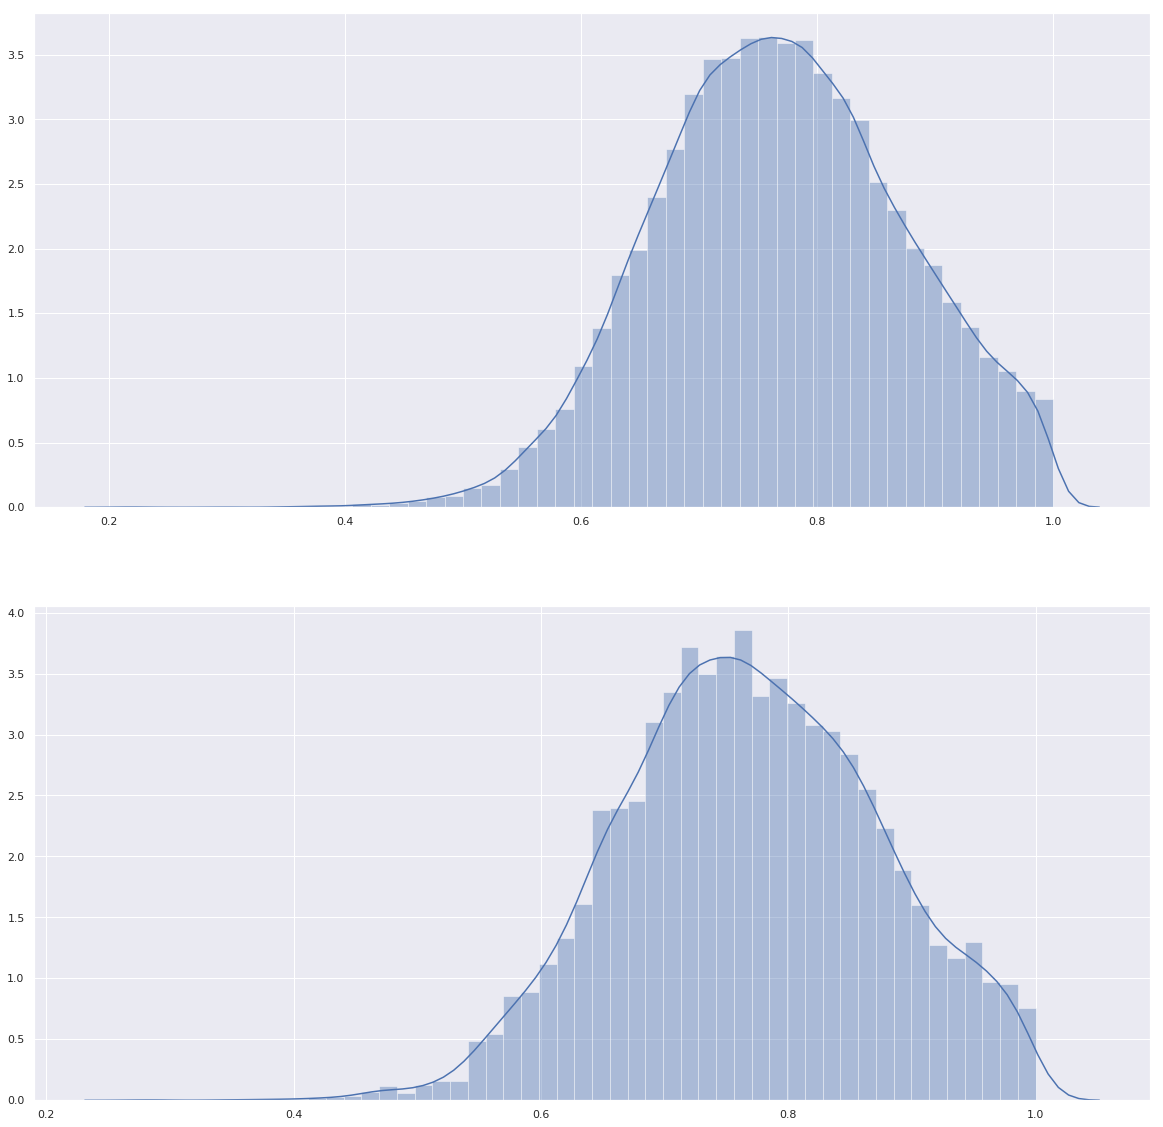

In [161]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train_view,ax=axarr[0])
sns.distplot(inputLabel_test_view,ax=axarr[1])

In [162]:
y_train_view = inputLabel_train_view
y_train_view = np.asarray(y_train_view).reshape(-1,1)
y_test_view = inputLabel_test_view
y_test_view= np.asarray(y_test_view).reshape(-1,1)

In [163]:
y_train_view, y_val_view = train_test_split(y_train_view, test_size=0.2,random_state=100)

In [164]:
y_test_view.shape

(8290, 1)

## Prepare data for Keras

In [165]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [166]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [167]:
x_train.shape

(26527, 2885)

In [168]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (26527, 2885)
val size (6632, 2885)
test size (8290, 2885)


In [169]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)

In [170]:
y_train_class = np_utils.to_categorical(y_train_class)
y_val_class = np_utils.to_categorical(y_val_class)
y_test_class = np_utils.to_categorical(y_test_class)

In [171]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [172]:
print("train size",y_train_class.shape)
print("train size",y_val_class.shape)
print("test size",y_test_class.shape)
print("train size",y_train_view.shape)
print("train size",y_val_view.shape)
print("test size",y_test_view.shape)

train size (26527, 7)
train size (6632, 7)
test size (8290, 7)
train size (26527, 1)
train size (6632, 1)
test size (8290, 1)


## Create Model

In [228]:
# from sklearn.model_selection import KFold

In [229]:
# kfold = KFold(10, True, 1)

In [230]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(x)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

# #     x = Dense(2048, activation='relu')(input1)
# #     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
#     return model


In [246]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
#     x = Dense(2048, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    class_out = Dense(7,activation='softmax')(x)
    
    model = Model(inputs=input1, outputs=class_out)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [291]:
def create_model_2():
    input1 = Input(shape=(x_train.shape[1]+7,))
    x = Dense(256, activation='elu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='elu')(x)
#     x = Dropout(0.5)(x)
    x = Dense(64, activation='elu')(x)
    x = Dropout(0.2)(x)
#     x = Dense(32, activation='elu')(x)
#     x = Dropout(0.2)(x)
    x = Dense(16, activation='elu')(x)
    x = Dropout(0.2)(x)
    view_out = Dense(1,activation='linear')(x)
    
    model = Model(inputs=input1, outputs=view_out)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=adam,  loss='mse') 
    return model


In [247]:
model_class = create_model()
print(model_class.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 2885)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               738816    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_34 (Dropout)         (None, 32)                0         
__________

In [292]:
model_view = create_model_2()
print(model_view.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 2892)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               740608    
_________________________________________________________________
dropout_55 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_57 (Dropout)         (None, 16)                0         
__________

In [184]:
# weight_path='./model_ver2_1.h5'
# callbacks_list = [
#         ModelCheckpoint(
#             weight_path,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=1
#         )
# ]

In [293]:
weight_path_class='./model_class_ch3_2.h5'
callbacks_list_class = [
        ModelCheckpoint(
            weight_path_class,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]
weight_path_view='./model_view_ch3_2.h5'
callbacks_list_view = [
        ModelCheckpoint(
            weight_path_view,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [249]:
model_class.fit(x_train,y_train_class, 
          batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val,y_val_class],callbacks=callbacks_list_class)

Train on 26527 samples, validate on 6632 samples
Epoch 1/30
26527/26527 [==============================] - 7s 255us/step - loss: 1.8720 - acc: 0.2190 - val_loss: 1.7988 - val_acc: 0.2734

Epoch 00001: val_acc improved from -inf to 0.27337, saving model to ./model_class_ch3_2.h5
Epoch 2/30
26527/26527 [==============================] - 6s 228us/step - loss: 1.7602 - acc: 0.2829 - val_loss: 1.7686 - val_acc: 0.2835

Epoch 00002: val_acc improved from 0.27337 to 0.28347, saving model to ./model_class_ch3_2.h5
Epoch 3/30
26527/26527 [==============================] - 6s 225us/step - loss: 1.6595 - acc: 0.3246 - val_loss: 1.7699 - val_acc: 0.2830

Epoch 00003: val_acc did not improve from 0.28347
Epoch 4/30
26527/26527 [==============================] - 6s 227us/step - loss: 1.5316 - acc: 0.3750 - val_loss: 1.8331 - val_acc: 0.2780

Epoch 00004: val_acc did not improve from 0.28347
Epoch 5/30
26527/26527 [==============================] - 6s 226us/step - loss: 1.3796 - acc: 0.4356 - val_los

In [254]:
weight_model_class ='./model_class_ch3_2.h5'
model_class = create_model()
model_class.load_weights(weight_model_class)
# model._make_predict_functi"on()
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 2885)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               738816    
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_38 (Dropout)         (None, 32)                0         
__________

In [262]:
x_pred_class_train = model_class.predict(x_train)
x_pred_class_val = model_class.predict(x_val)

In [263]:
x_train_class = np.concatenate((x_train, x_pred_class_train), axis=1)
x_val_class = np.concatenate((x_val, x_pred_class_val), axis=1)

In [294]:
model_view.fit(x_train_class, y_train_view, 
          batch_size=8 ,epochs=30, verbose=1, validation_data=[x_val_class,y_val_view],callbacks=callbacks_list_view)

Train on 26527 samples, validate on 6632 samples
Epoch 1/30
26527/26527 [==============================] - 21s 778us/step - loss: 0.0488 - val_loss: 0.0093

Epoch 00001: val_loss improved from inf to 0.00926, saving model to ./model_view_ch3_2.h5
Epoch 2/30
26527/26527 [==============================] - 19s 731us/step - loss: 0.0231 - val_loss: 0.0086

Epoch 00002: val_loss improved from 0.00926 to 0.00865, saving model to ./model_view_ch3_2.h5
Epoch 3/30
26527/26527 [==============================] - 19s 734us/step - loss: 0.0163 - val_loss: 0.0085

Epoch 00003: val_loss improved from 0.00865 to 0.00849, saving model to ./model_view_ch3_2.h5
Epoch 4/30
26527/26527 [==============================] - 19s 724us/step - loss: 0.0127 - val_loss: 0.0084

Epoch 00004: val_loss improved from 0.00849 to 0.00842, saving model to ./model_view_ch3_2.h5
Epoch 5/30
26527/26527 [==============================] - 19s 723us/step - loss: 0.0108 - val_loss: 0.0085

Epoch 00005: val_loss did not improve f

In [295]:
weight_model_view ='./model_view_ch3_2.h5'
model_view = create_model_2()
model_view.load_weights(weight_model_view)
# model._make_predict_functi"on()
model_view.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 2892)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 256)               740608    
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_59 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_60 (Dropout)         (None, 16)                0         
__________

## Evaluate Model

In [255]:
y_pred_class = model_class.predict(x_test)

In [256]:
def evaluate_class(y_pred, y_test):
    acc = 0
    pred = list()
    true = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
        true.append(np.argmax(y_test[i]))
    return f1_score(true, pred, average='micro'),pred,true  

In [257]:
f1,pred,true = evaluate_class(y_pred_class,y_test_class)

In [258]:
f1

0.2759951749095296

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
accuracy_score(true, pred)

0.27454764776839563

In [259]:
def evaluate_heat(y_pred,y_test):
    correct = 0
    wrong = 0
    count = [0,0,0,0,0,0,0,0]
    heatmap =[[0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0]]
    true_pred = [0]*8
    for i in range(len(y_pred)):
        p_level_pred = np.argmax(y_pred[i])
        p_level_test = np.argmax(y_test[i])
        count[p_level_pred]+=1
        heatmap[p_level_test][p_level_pred]+=1
        if(p_level_pred == p_level_test):
            true_pred[p_level_pred] += 1
            correct += 1
        else:
            wrong +=1
    print(np.asarray(heatmap))
    heatmap = [[line[i]/np.sum(line) for i in range(len(line))] for line in heatmap]
    print(count)
    return correct/(correct+wrong), heatmap

In [260]:
score, heatmap = evaluate_heat(y_pred_class, y_test_class)
print(score)
# print(heatmap)

[[398 326  27   0  99   0  59   0]
 [217 545  70   0 272   0 125   0]
 [112 419  63   0 380   0 162   0]
 [ 76 307  67   0 374   0 188   0]
 [ 76 287  54   0 524   0 460   0]
 [ 49 167  33   0 339   0 464   0]
 [ 72 219  30   0 472   0 758   0]
 [  0   0   0   0   0   0   0   0]]
[1000, 2270, 344, 0, 2460, 0, 2216, 0]
0.2759951749095296


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


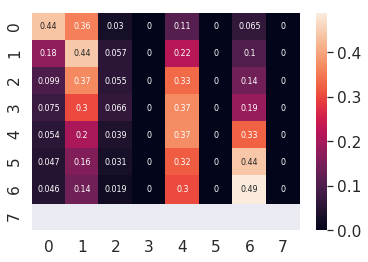

In [261]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

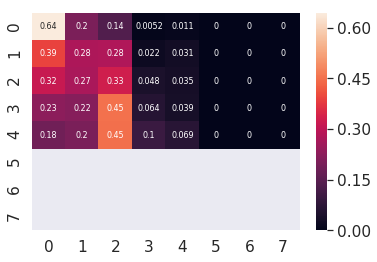

In [955]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

In [285]:
x_test_view = np.concatenate((x_test, y_pred_class), axis=1)

In [296]:
y_pred_view = model_view.predict(x_test_view)

In [297]:
y_pred_view.shape

(8290, 1)

In [298]:
y_test_view.shape

(8290, 1)

In [299]:
mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 79181.02284056577
rmse : 281.3912273695926
mae : 187.59325896753623


In [205]:
# mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
# print('mse :',mse)
# print('rmse :',rmse)
# print('mae :',mae)

mse : 83285.12103821612
rmse : 288.5916163685566
mae : 187.08860547292218


In [206]:
x_train_class.shape

(26527, 2892)

In [207]:
y_train_view.shape

(26527, 1)

In [300]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_train_class),y_train_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [301]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

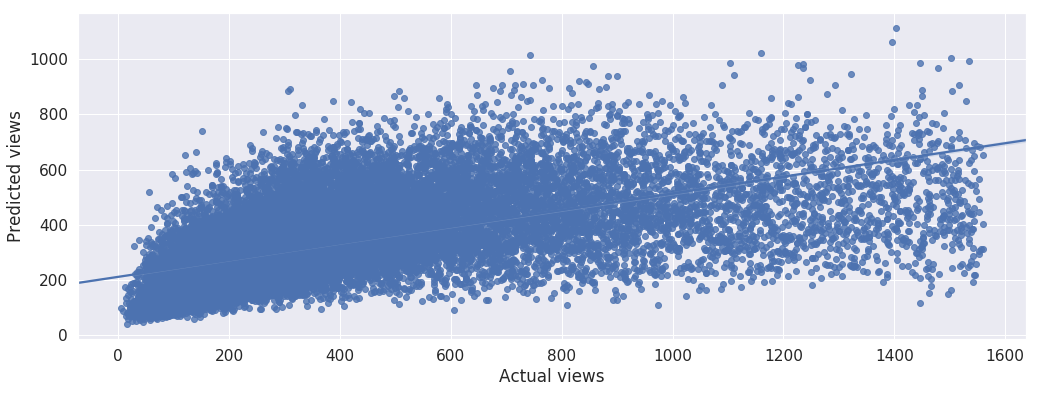

In [302]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


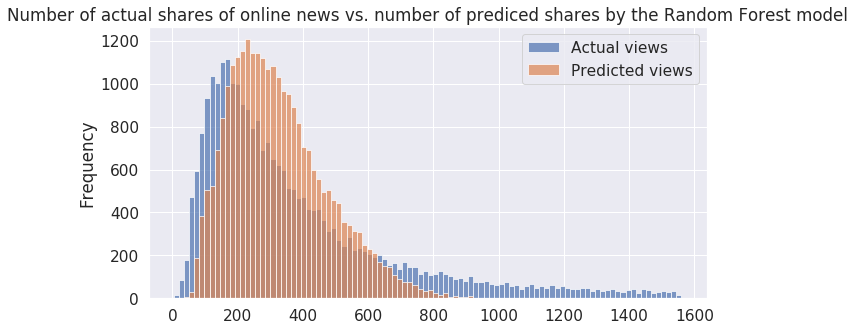

In [303]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [304]:
x_test_view.shape

(8290, 2892)

In [305]:
y_test_view.shape

(8290, 1)

In [306]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_test_view),y_test_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [307]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

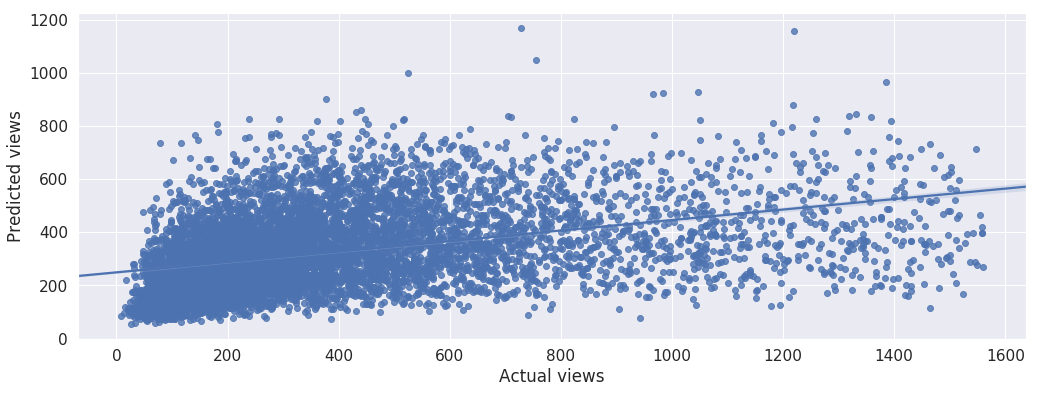

In [308]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

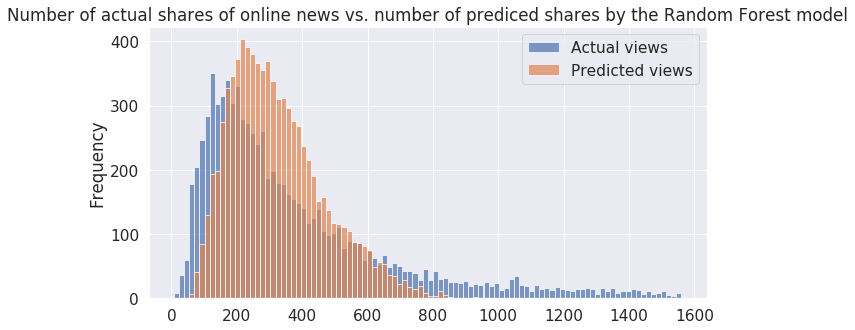

In [309]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [310]:
df_someXdata_LR.to_csv('output-ch3.csv')

In [312]:
input_ch3_test.to_csv('headline-test-ch3.csv')

## compared to baseline model

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
view_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

38144568957857.875

In [221]:
lin_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(lin_mae)

419073749408.68097


In [222]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [223]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [224]:
view_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error( np.exp(y_test_view*MAXVIEW_log), view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

371.2982635465265

In [225]:
tree_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(tree_mae)

250.2496381182147


In [226]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [227]:
share_predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

294.70828669335117

In [228]:
forest_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
print(forest_mae) #with outliers:1424

201.3044153598713


In [229]:
df_someXdata = pd.DataFrame(forest_reg.predict(x_test),np.exp(y_test_view*MAXVIEW_log) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,962.00001,275.80001
1,283.00001,218.50001
2,668.00001,358.90001
3,68.00001,267.90001
4,167.00001,267.30001


AttributeError: module 'seaborn' has no attribute 'plt'

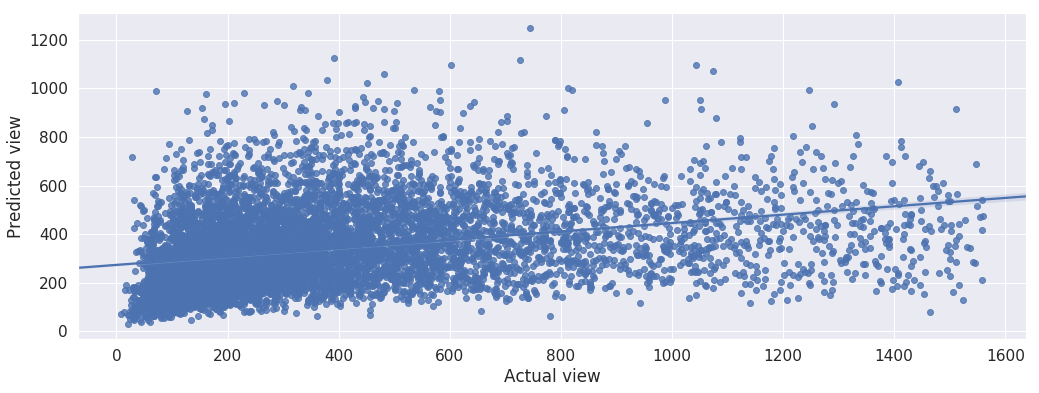

In [230]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


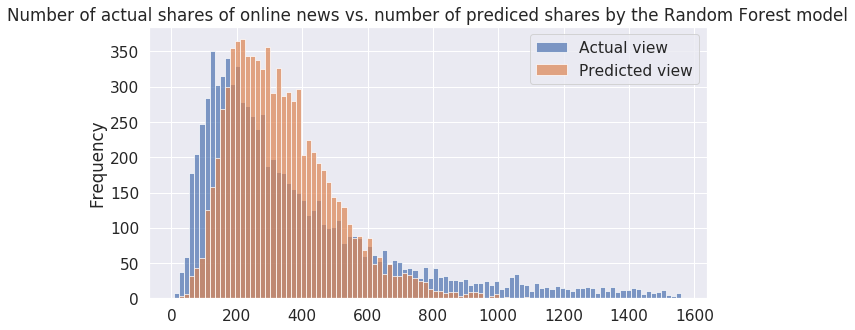

In [231]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()